In [23]:
import os
import sys
sys.path.append(os.getcwd())
sys.path.append('\\'.join(os.getcwd().split('\\')[:-3]))
import time

import numpy as np
import matplotlib.pyplot as plt
import pickle

from restools.standardised_programs import StandardisedProgramEdge, MoehlisModelIntegrator, EsnIntegrator
from restools.timeintegration import TimeIntegrationLowDimensional
from studies.none2021_moehlis_transition.extensions import LocalPythonTimeIntegrationGraph,\
    RemotePythonTimeIntegrationGraph
from comsdk.communication import LocalCommunication, SshCommunication
from comsdk.research import Research, CreateTaskGraph
from comsdk.graph import Graph, State, Func
from comsdk.edge import Edge, dummy_predicate, make_dump

In [2]:
local_comm = LocalCommunication.create_from_config()
res = Research.open('RC_MOEHLIS')
ics = []
source_task = 42

for ic_i in range(1, 101):
    ti = TimeIntegrationLowDimensional(res.get_task_path(source_task), ic_i)
    ics.append(ti.timeseries[:10].tolist())

n_ics = len(ics)
re = 275
esn_name = f'esn_max_len_unuse_bias'
#esn_name = 'esn_trained_wo_lam_event'
l_x = 1.75
l_z = 1.2
#n_steps = 20000
n_steps = 2000
#n_steps = 2000
#n_steps = 200



Loaded research at C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn
Number of tasks in the current research: 50


In [3]:
data = {
        'res': res,
#        'esn_path': os.path.join(res.local_research_path, esn_name),
#        'esn_path': os.path.join(res.get_task_path(42), esn_name),
        'esn_path': r'C:\Users\ovann\Jupyter Notebook\7sem\VKR\\' + esn_name,
#        'esn_path': os.path.join(res.remote_research_path, esn_name),
        'dt_as_defined_by_esn': 1,
        'n_steps': n_steps,
        'final_time': n_steps,
        're': re,
        'l_x': l_x,
        'l_z': l_z,
        'initial_conditions': ics,
        'input_filename': 'inputs.json',
        'output_filenames': [str(i) for i in range(1, n_ics + 1)],
        'description': f'ESN trajectories for perturbation dynamics for lifetime distribution at Re = {re}. Initial conditions are taken from task '
                       f'{source_task}. '
                       f'Noise is disabled while predicting'
    }

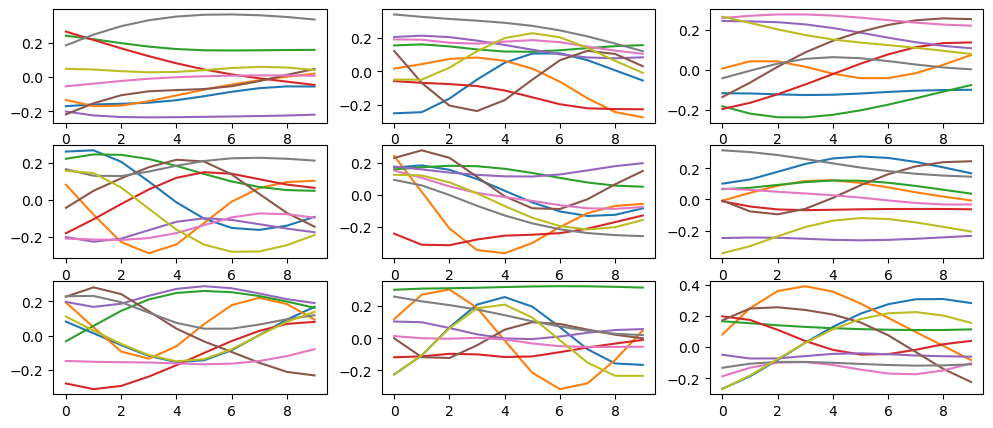

In [4]:
plt.figure(figsize=(12,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(ics)[i, :, :]);

In [5]:
graph = LocalPythonTimeIntegrationGraph(
    res, 
    local_comm, 
    EsnIntegrator(input_filename_key='input_filename', nohup=True), 
    input_filename=data['input_filename'],
    task_prefix=f'ESNPredictionNoNoise'
)

In [6]:
okay = graph.run(data)

STATE READY_FOR_TASK_CREATION
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
STATE TASK_CREATED
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
STATE READY_FOR_PYTHON_TIMEINTEGRATION
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0
C:\Users\ovann\Desktop\VKR\Reps\esn-studies\studies\none2022_why_do_esns_work\programs time_integrate_esn.py
STATE PYTHON_TIMEINTEGRATION_FINISHED
	just entered, implicit_parallelization_info: None
	required input: 1, active: 1, looped: 0


# Min len timeseries

In [144]:
%%time
file_path = r'C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn\47-ESNPredictionNoNoise_R_275_T_2000_ens_100\\'
data1 = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(file_path + str(num_data+1), 'rb') as a:
        b = pickle.load(a)
    data1.append(b['timeseries'])
    time.append(b['time'])

CPU times: total: 31.2 ms
Wall time: 384 ms


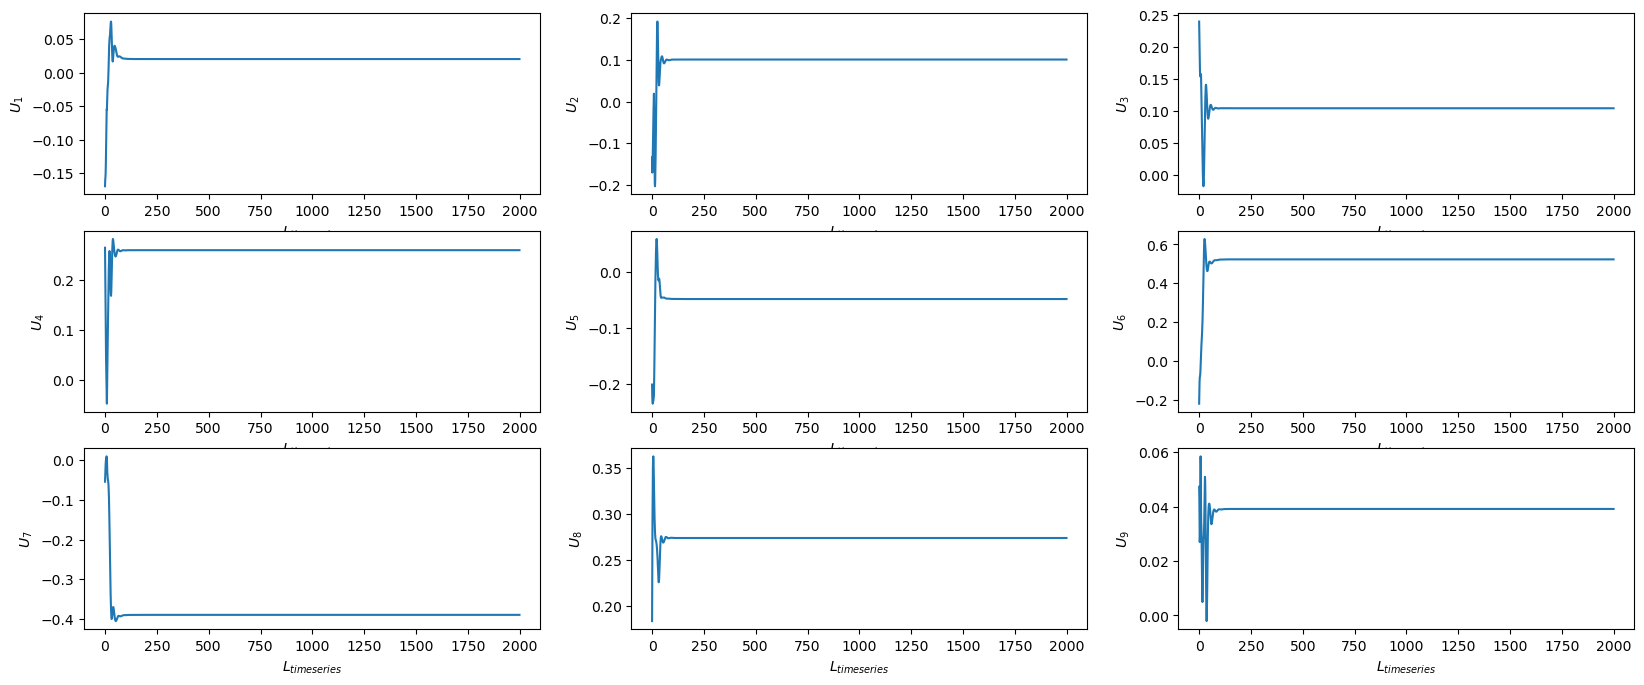

In [145]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data1[0])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

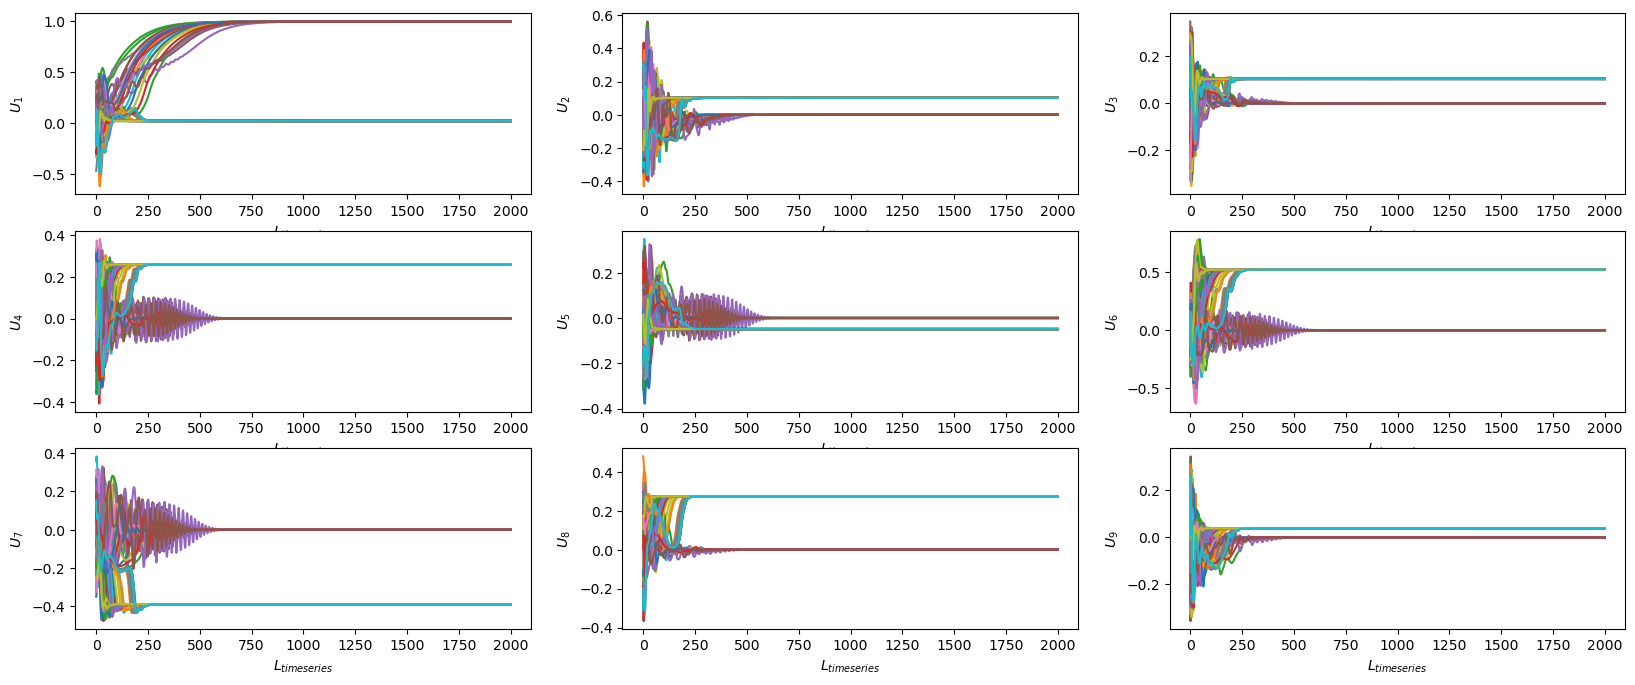

In [146]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j in range(100):
        plt.plot(np.array(data1[j])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

# Max len timeseries

In [135]:
%%time
file_path = r'C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn\46-ESNPredictionNoNoise_R_275_T_2000_ens_100\\'
data2 = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(file_path + str(num_data+1), 'rb') as a:
        b = pickle.load(a)
    data2.append(b['timeseries'])
    time.append(b['time'])

CPU times: total: 78.1 ms
Wall time: 398 ms


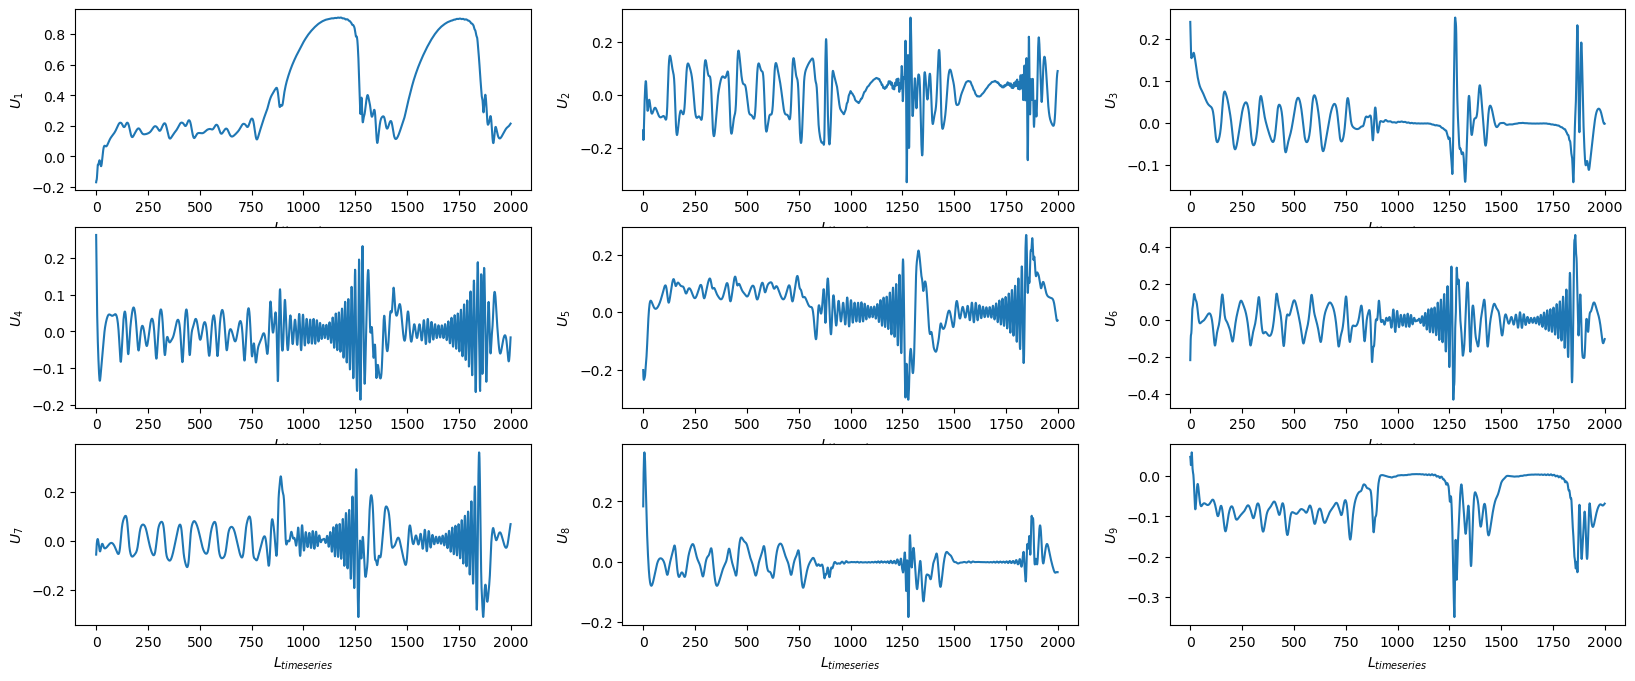

In [136]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data2[0])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

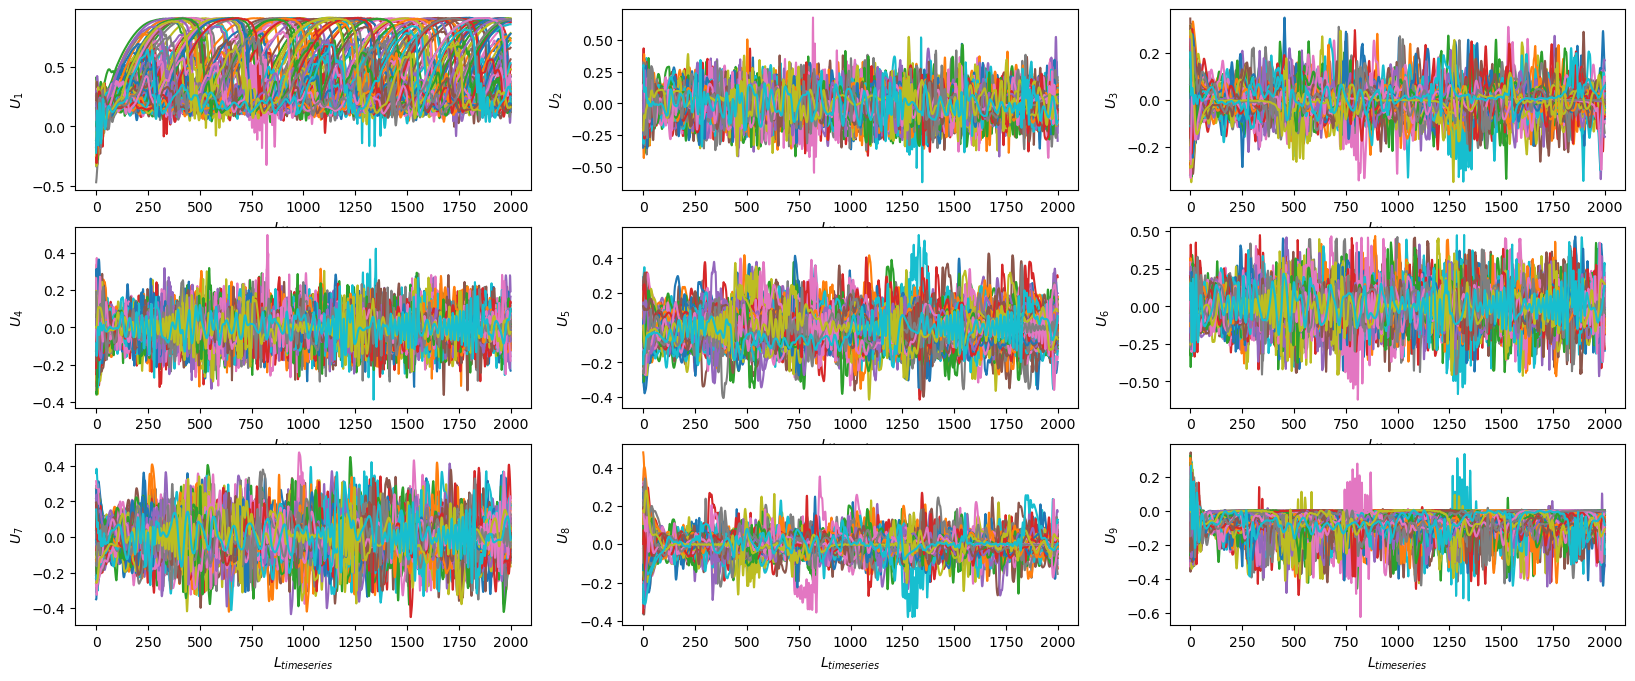

In [137]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j in range(100):
        plt.plot(np.array(data2[j])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

# 1954 len timeseries

In [153]:
%%time
file_path = r'C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn\48-ESNPredictionNoNoise_R_275_T_2000_ens_100\\'
data3 = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(file_path + str(num_data+1), 'rb') as a:
        b = pickle.load(a)
    data3.append(b['timeseries'])
    time.append(b['time'])

CPU times: total: 46.9 ms
Wall time: 422 ms


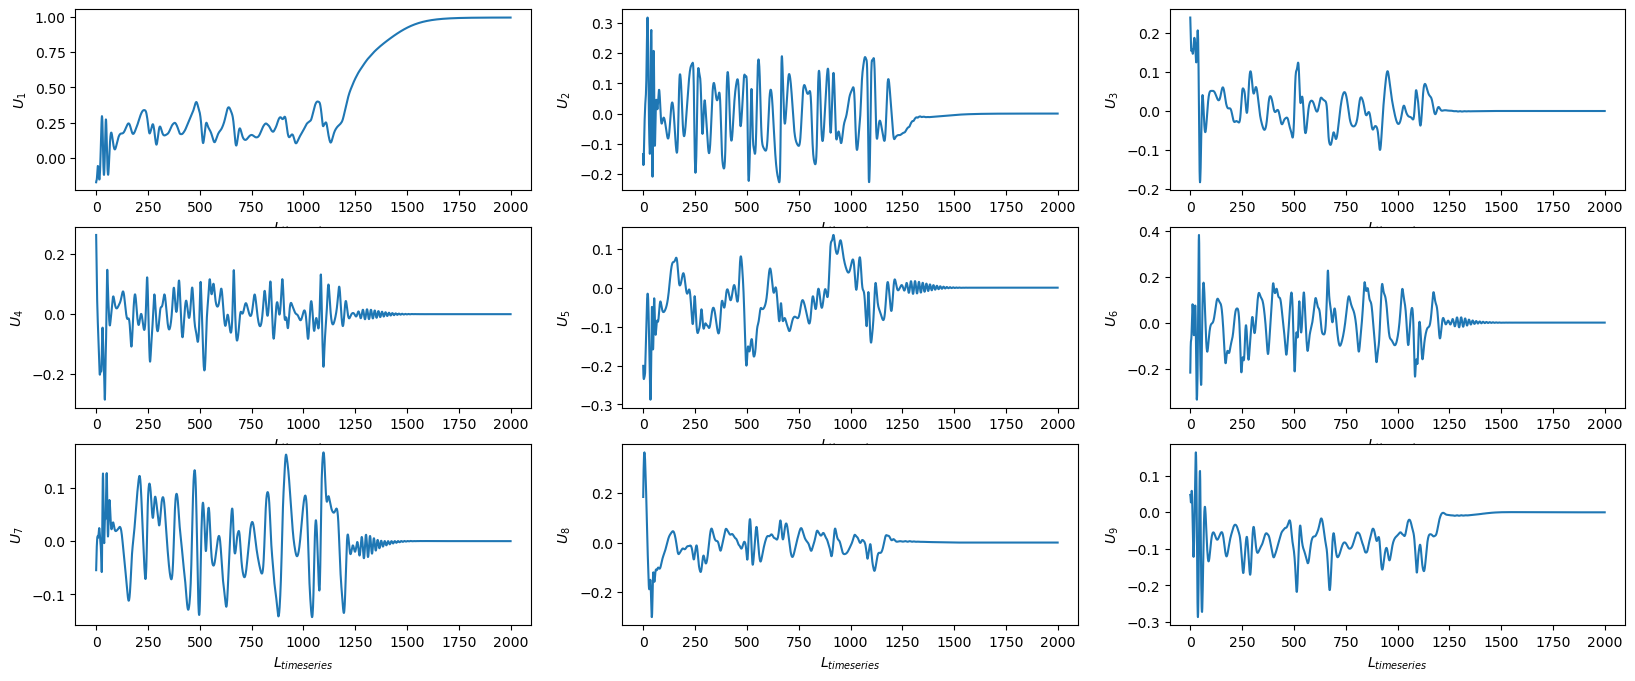

In [154]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data3[0])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

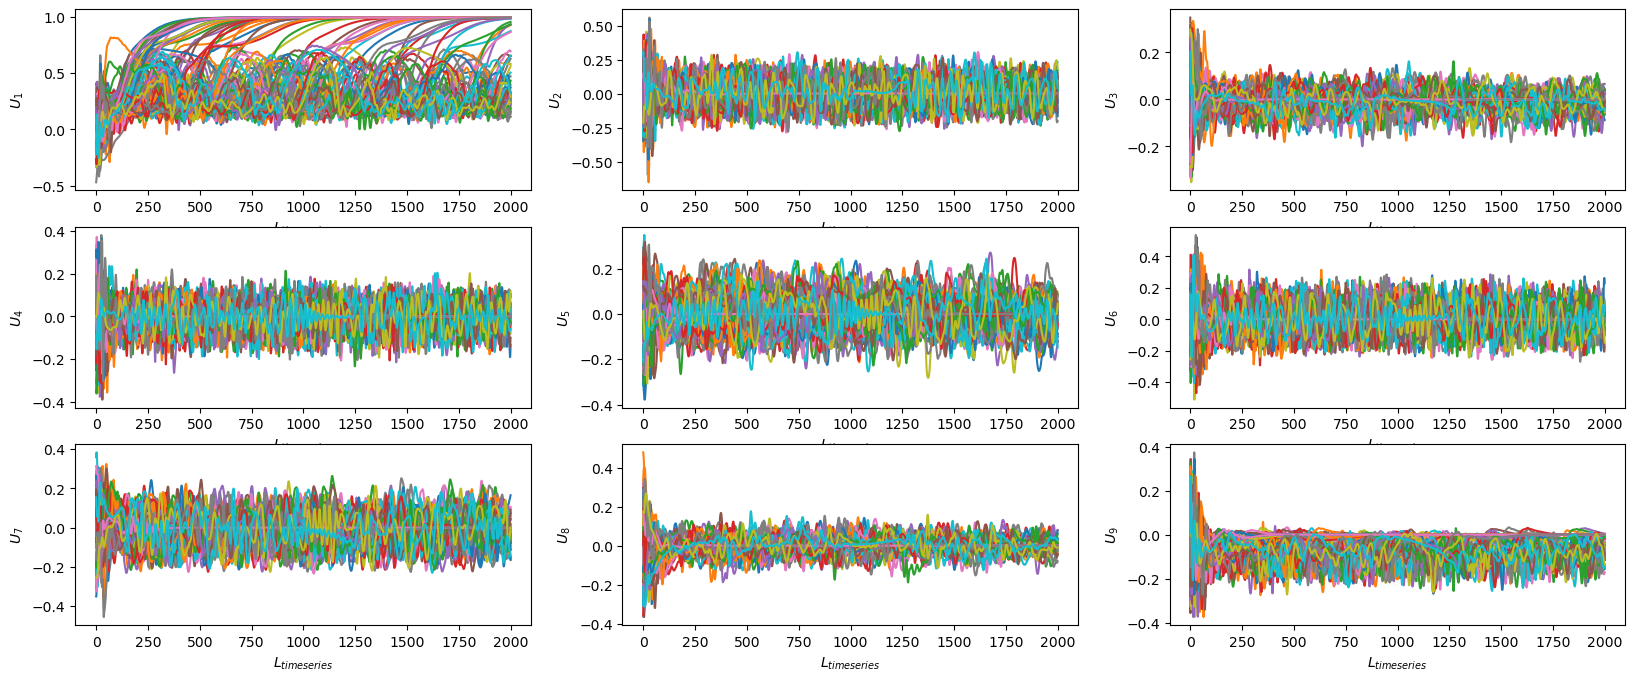

In [155]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j in range(100):
        plt.plot(np.array(data3[j])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

# Join min max

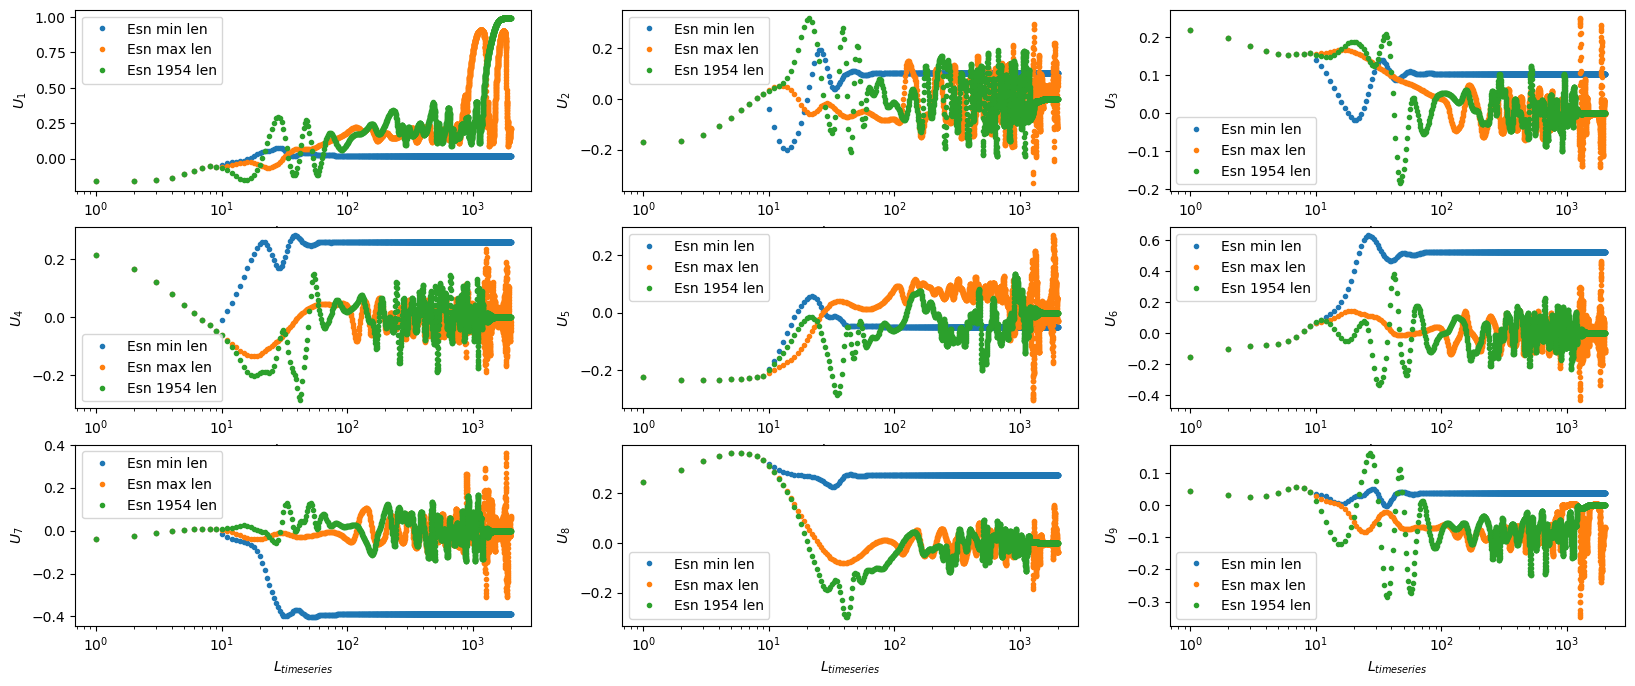

In [159]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data1[0])[:, i], '.', label='Esn min len');
    plt.plot(np.array(data2[0])[:, i], '.', label='Esn max len');
    plt.plot(np.array(data3[0])[:, i], '.', label='Esn 1954 len');
    
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    plt.semilogx()
    plt.legend()

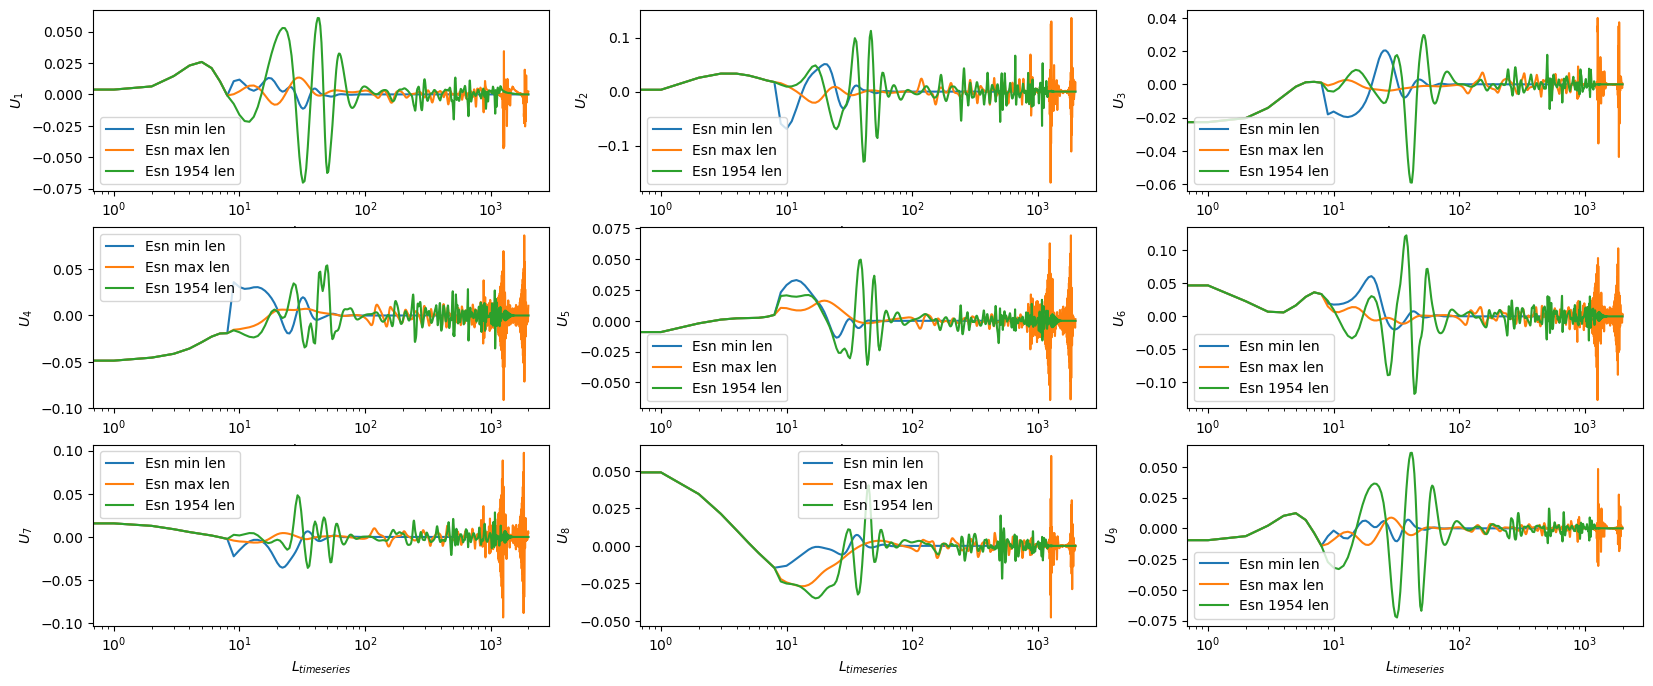

In [163]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.diff(np.array(data1[0])[:, i], n=1), '-', label='Esn min len');
    plt.plot(np.diff(np.array(data2[0])[:, i], n=1), '-', label='Esn max len');
    plt.plot(np.diff(np.array(data3[0])[:, i], n=1), '-', label='Esn 1954 len');
    
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    plt.semilogx()
    plt.legend()

# Max len timeseries - 10_000 n_steps

In [7]:
%%time
file_path = r'C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn\49-ESNPredictionNoNoise_R_275_T_10000_ens_100\\'
data4 = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(file_path + str(num_data+1), 'rb') as a:
        b = pickle.load(a)
    data4.append(b['timeseries'])
    time.append(b['time'])

CPU times: total: 46.9 ms
Wall time: 61.8 ms


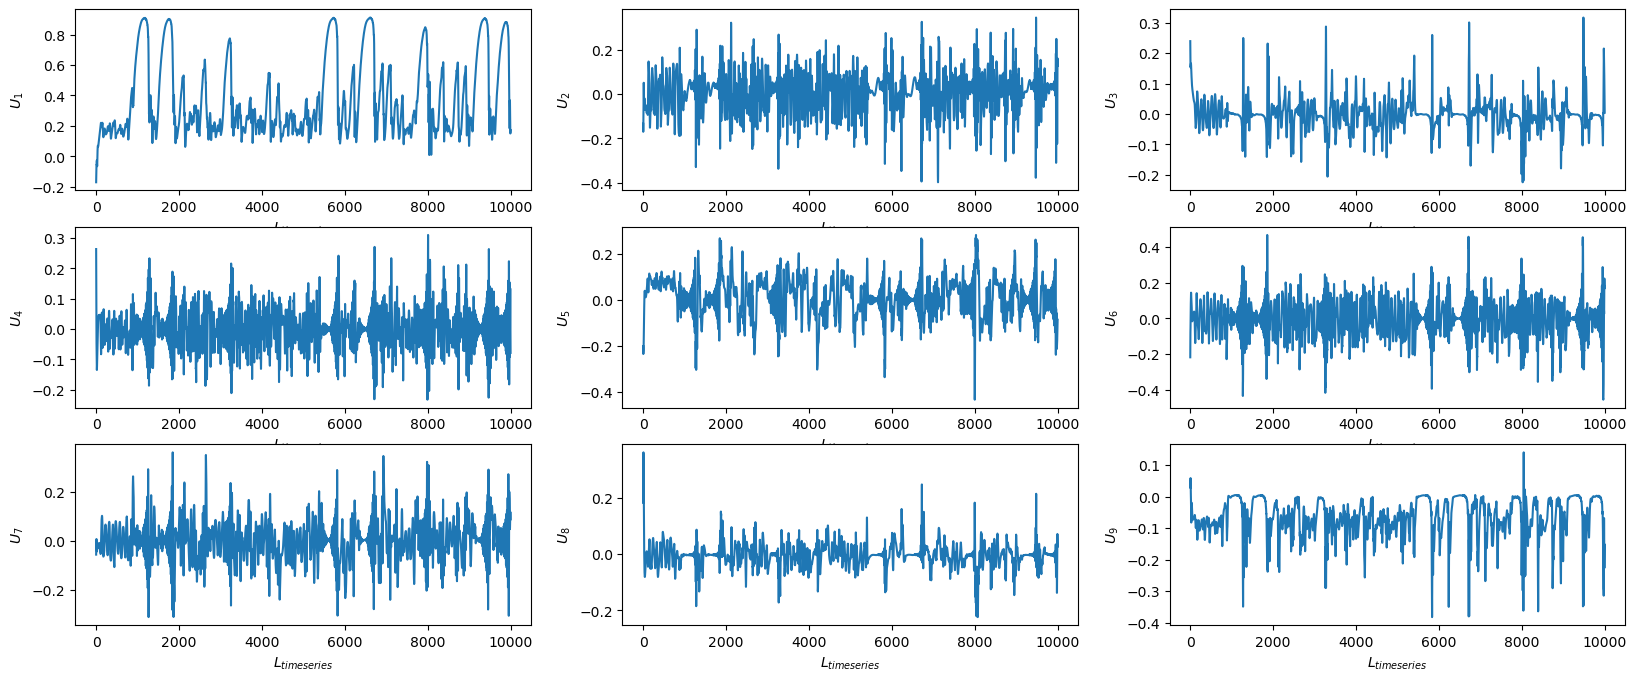

In [8]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data4[0])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

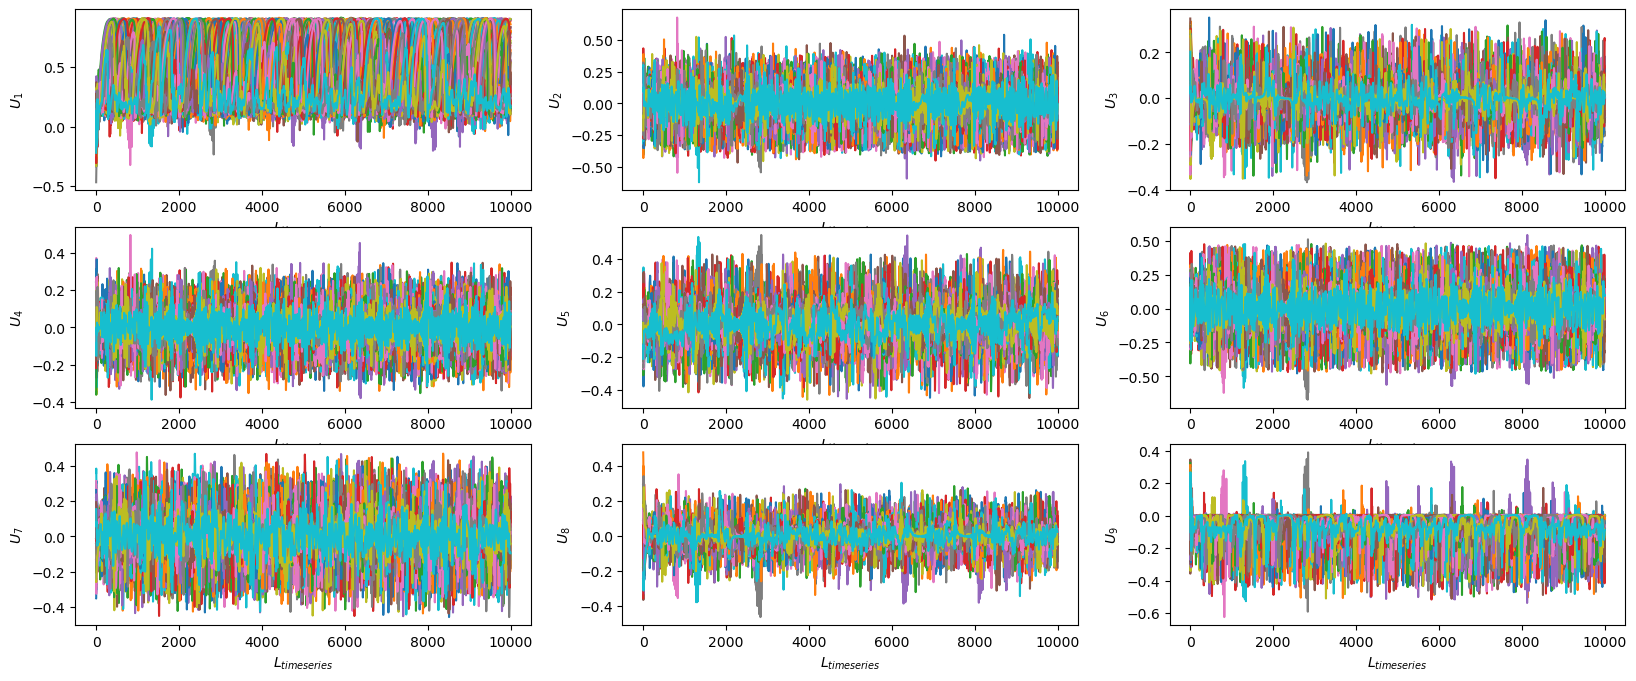

In [10]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j in range(100):
        plt.plot(np.array(data4[j])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

# Max len timeseries unuse bias

In [9]:
%%time
file_path = r'C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn\50-ESNPredictionNoNoise_R_275_T_2000_ens_100\\'
data5 = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(file_path + str(num_data+1), 'rb') as a:
        b = pickle.load(a)
    data5.append(b['timeseries'])
    time.append(b['time'])

CPU times: total: 46.9 ms
Wall time: 20.9 ms


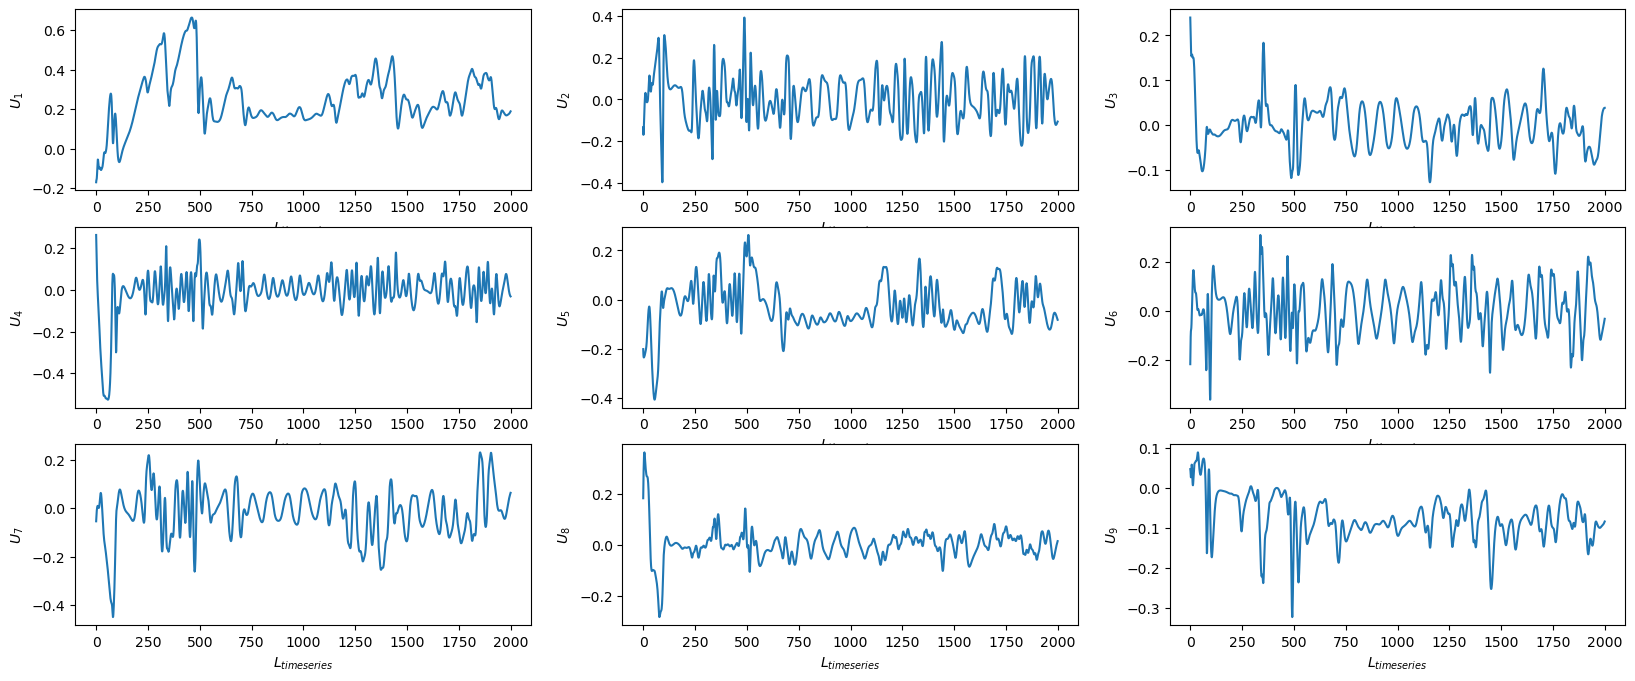

In [10]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(np.array(data5[0])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()

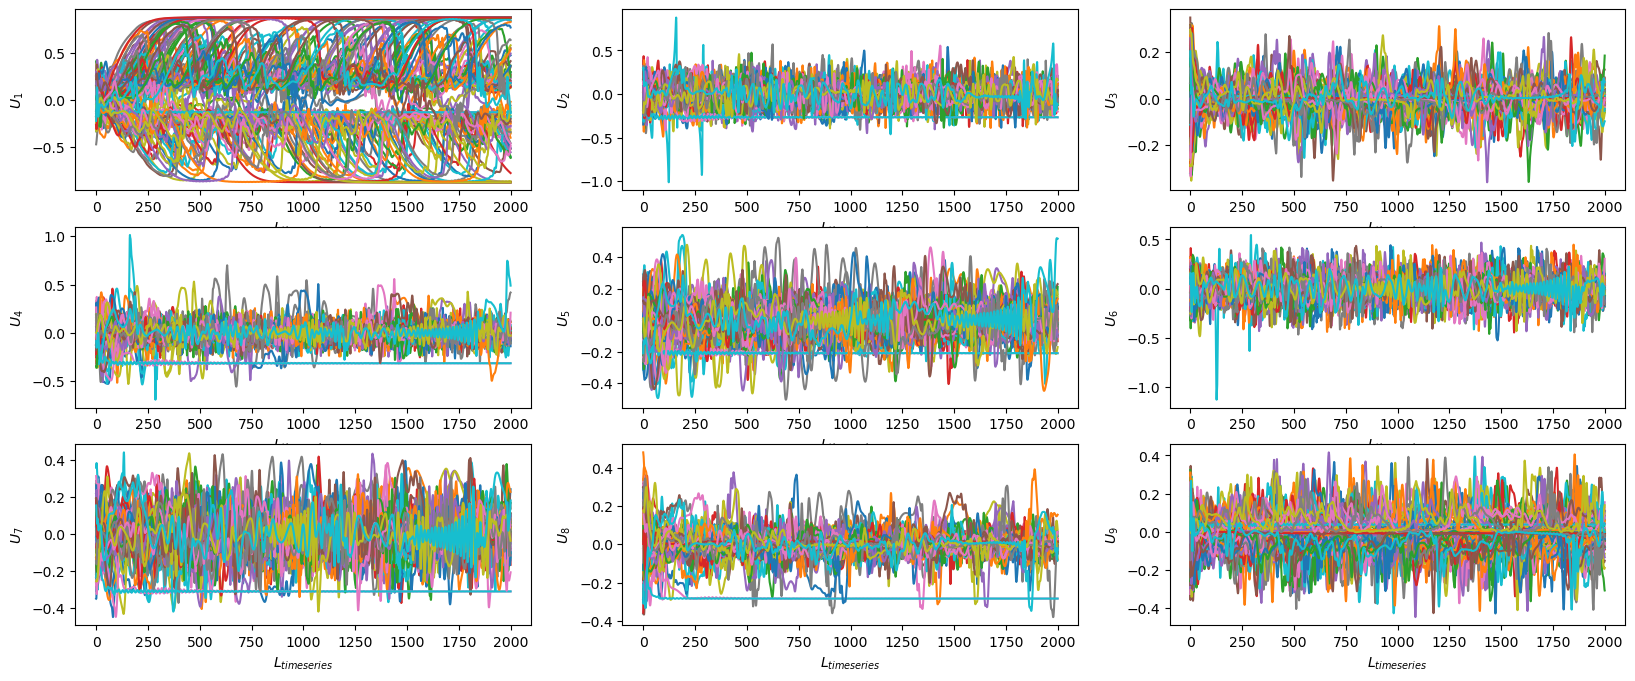

In [11]:
plt.figure(figsize=(20,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j in range(100):
        plt.plot(np.array(data5[j])[:, i], '-');
    plt.xlabel(fr'$L_{"{timeseries}"}$')
    plt.ylabel(fr'$U_{i+1}$')
    #plt.semilogx()